In [85]:
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_rows', 16)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import gc

In [86]:
plt.rcParams['figure.figsize'] = (16.0, 9.0)

# Data

In [87]:
START = '2007-01-01'
END = '2024-04-15'

In [88]:
# Security Id
stk_info = DataAPI.SecIDGet(assetClass="E",pandas="1")
cond1 = (stk_info['exchangeCD'] == 'XSHE') | (stk_info['exchangeCD'] == 'XSHG')
cond2 = (stk_info['listStatusCD'] == 'L') | (stk_info['listStatusCD'] == 'DE')
cond3 = stk_info['transCurrCD']=='CNY'
stk_info = stk_info[cond1 & cond2 & cond3].copy()
stk_id = stk_info['secID']

In [89]:
stk_info

secID    ticker secShortName cnSpell exchangeCD assetClass  \
0        000001.XSHE    000001         平安银行    PAYH       XSHE          E   
1        000002.XSHE    000002          万科A     WKA       XSHE          E   
2        000003.XSHE    000003        PT金田A   PTJTA       XSHE          E   
3        000004.XSHE    000004         国华网安    GHWA       XSHE          E   
4        000005.XSHE    000005         ST星源    STXY       XSHE          E   
5        000006.XSHE    000006         深振业A    SZYA       XSHE          E   
6        000007.XSHE    000007        *ST全新   *STQX       XSHE          E   
7        000008.XSHE    000008         神州高铁    SZGT       XSHE          E   
...              ...       ...          ...     ...        ...        ...   
12386    688793.XSHG    688793          倍轻松     BQS       XSHG          E   
12387    688798.XSHG    688798         艾为电子    AWDZ       XSHG          E   
12388    688799.XSHG    688799         华纳药厂    HNYC       XSHG          E   
12389    688800.XSHG    688800          瑞可达     RKD       XSHG          E   
12390    688819.XSHG    688819         天能股份    TNGF       XSHG          E   
12391    688981.XSHG    688981         中芯国际    ZXGJ       XSHG          E   
12392    689009.XSHG    689009         九号公司    JHGS       XSHG          E   
31165  DY600018.XSHG  DY600018         上港集箱    SGJX       XSHG          E   

      listStatusCD    listDate transCurrCD          ISIN     partyID  \
0                L  1991-04-03         CNY  CNE000000040         2.0   
1                L  1991-01-29         CNY  CNE0000000T2         3.0   
2               DE  1991-07-03         CNY  CNE1000031Y5         4.0   
3                L  1990-12-01         CNY  CNE0000000Y2         5.0   
4                L  1990-12-10         CNY  CNE0000001L7         6.0   
5                L  1992-04-27         CNY  CNE000000164         7.0   
6                L  1992-04-13         CNY  CNE0000000P0         8.0   
7                L  1992-05-07         CNY  CNE0000001C6         9.0   
...            ...         ...         ...           ...         ...   
12386            L  2021-07-15         CNY           NaN     28370.0   
12387            L  2021-08-16         CNY  CNE1000050N8    330517.0   
12388            L  2021-07-13         CNY  CNE100004P73     81902.0   
12389            L  2021-07-22         CNY  CNE100004P32     97562.0   
12390            L  2021-01-18         CNY           NaN     70519.0   
12391            L  2020-07-16         CNY  CNE1000041W8  10000366.0   
12392            L  2020-10-29         CNY           NaN   1093794.0   
31165           DE  2000-07-19         CNY           NaN       618.0   

       delistDate  
0             NaN  
1             NaN  
2      2002-06-14  
3             NaN  
4             NaN  
5             NaN  
6             NaN  
7             NaN  
...           ...  
12386         NaN  
12387         NaN  
12388         NaN  
12389         NaN  
12390         NaN  
12391         NaN  
12392         NaN  
31165  2006-10-20  

[5359 rows x 12 columns]

## ST

In [90]:
st_df = DataAPI.SecSTGet(beginDate=START,endDate=END,secID=stk_id,field=['secID','tradeDate','STflg'],pandas="1")

In [91]:
st_df['tradeDate'] = pd.to_datetime(st_df['tradeDate'],format="%Y-%m-%d")

## Risk free rate

In [92]:
DataAPI.MktIborGet(secID="Shibor1M.IRCN",beginDate=START,endDate=END,field=['secID','tradeDate','rate'],pandas="1")

secID   tradeDate    rate
0     Shibor1M.IRCN  2007-01-04  2.5774
1     Shibor1M.IRCN  2007-01-05  2.5717
2     Shibor1M.IRCN  2007-01-08  2.5588
3     Shibor1M.IRCN  2007-01-09  2.5572
4     Shibor1M.IRCN  2007-01-10  2.5463
5     Shibor1M.IRCN  2007-01-11  2.5343
6     Shibor1M.IRCN  2007-01-12  2.5254
7     Shibor1M.IRCN  2007-01-15  2.5207
...             ...         ...     ...
4306  Shibor1M.IRCN  2024-04-02  2.1100
4307  Shibor1M.IRCN  2024-04-03  2.0970
4308  Shibor1M.IRCN  2024-04-07  2.0820
4309  Shibor1M.IRCN  2024-04-08  2.0620
4310  Shibor1M.IRCN  2024-04-09  2.0500
4311  Shibor1M.IRCN  2024-04-10  2.0490
4312  Shibor1M.IRCN  2024-04-11  2.0390
4313  Shibor1M.IRCN  2024-04-12  2.0250

[4314 rows x 3 columns]

In [93]:
shibor_df = DataAPI.MktIborGet(secID="Shibor1M.IRCN",beginDate=START,endDate=END,field=['secID','tradeDate','rate'],pandas="1")
shibor_df['rate'] = shibor_df['rate']*0.01/12
shibor_df['tradeDate'] = pd.to_datetime(shibor_df['tradeDate'])
shibor_df.drop('secID',axis=1,inplace=True)
shibor_df.rename(columns={'rate':'rf'},inplace=True)
shibor_df['ym'] = shibor_df['tradeDate'].dt.to_period('M')
shibor_df.sort_values('tradeDate',inplace=True)
shibor_df_m = shibor_df.groupby('ym',as_index=False).last()
shibor_df_m.drop('tradeDate',axis=1,inplace=True)
shibor_df_m

ym        rf
0    2007-01  0.002100
1    2007-02  0.002110
2    2007-03  0.002234
3    2007-04  0.002125
4    2007-05  0.002527
5    2007-06  0.002542
6    2007-07  0.002481
7    2007-08  0.002404
..       ...       ...
200  2023-09  0.001904
201  2023-10  0.001890
202  2023-11  0.001914
203  2023-12  0.002068
204  2024-01  0.001902
205  2024-02  0.001749
206  2024-03  0.001783
207  2024-04  0.001687

[208 rows x 2 columns]

## Beta

In [94]:
beta_df = pd.read_pickle('./data/beta_df.pkl')
beta_df['tradeDate'] = pd.to_datetime(beta_df['tradeDate'], format="%Y-%m-%d")
beta_df['ym'] = beta_df['tradeDate'].dt.to_period('M')
beta_df.drop(['Beta60','Beta120'],axis=1,inplace=True)
beta_df['Beta252'] = pd.to_numeric(beta_df['Beta252'])
# Winsorization
# up_q = 0.99999
# lower_q = 0.00001
# beta_df['Beta252_winsor'] = beta_df['Beta252'].clip(lower=beta_df['Beta252'].quantile(lower_q),upper=beta_df['Beta252'].quantile(up_q))
# Monthly
beta_df_m = beta_df.groupby(['secID','ym'],as_index=False)['Beta252'].last()
beta_df_m.rename(columns={'Beta252':'beta'},inplace=True)
beta_df_m

secID       ym    beta
0       000001.XSHE  2007-01  0.7949
1       000001.XSHE  2007-02  0.7880
2       000001.XSHE  2007-03  0.8512
3       000001.XSHE  2007-04  0.8642
4       000001.XSHE  2007-05  0.7715
5       000001.XSHE  2007-06  0.4614
6       000001.XSHE  2007-07  0.6423
7       000001.XSHE  2007-08  0.7722
...             ...      ...     ...
619996  689009.XSHG  2023-08  0.8234
619997  689009.XSHG  2023-09  0.9152
619998  689009.XSHG  2023-10  0.9247
619999  689009.XSHG  2023-11  0.9541
620000  689009.XSHG  2023-12  1.0448
620001  689009.XSHG  2024-01  1.2314
620002  689009.XSHG  2024-02  1.4905
620003  689009.XSHG  2024-03  1.5477

[620004 rows x 3 columns]

## Trading data

In [ ]:
stk_df = pd.read_pickle('./data/stk_df.pkl')
stk_df['tradeDate'] = pd.to_datetime(stk_df['tradeDate'], format='%Y-%m-%d')
stk_df['ym'] = stk_df['tradeDate'].dt.to_period('M')
stk_df.sort_values(['secID','tradeDate'],inplace=True)
# drop ST stocks
print(stk_df.shape)
stk_df = pd.merge(stk_df, st_df, on=['secID','tradeDate'],how='left')
stk_df = stk_df[stk_df['STflg'].isna()].copy()
stk_df.drop('STflg',axis=1,inplace=True)
print(stk_df.shape)
# Monthly
stk_df_m = stk_df.groupby(['secID','ym'],as_index=False).last()

(12553162, 8)


In [ ]:
stk_df_m

In [ ]:
pd.__version__

## Momentum

Momentum 介绍：

Momentum即动量，指的是过去一段时间表现较好的股票，在未来一段时间内也会较好。“过去”和“未来”有很多定义，比较常见的：
- 过去：t月前的t-12:t-2个月的累积收益率
- 未来: t月的收益

也即，中间跳过了一个月，t-1。
这是因为，短期发现了反转，reversal：上个月表现好的，这个月表现差

Momentum 的计算涉及到pandas groupby rolling。如果是自定义的函数，apply会比较慢。但新版本(pandas version >= 1)中，apply中可以指定用numba作为计算引擎，速度会快非常多。由于优矿的pandas版本很低, 没有这个选项。

另外，按照月来做rolling时，pandas rolling的选项不可以用"MonthEnd"这样长度不固定的时间作为window size。因此，如果想做得很精确的话，需要用一些其他的办法。一种比较容易的思路是把停牌的日期(用MultiIndex)填上，对应的ret值留空。窗口长度就可以固定（通过指定observation个数，而不是月份数）。

- 注意：应当先计算收益率，再填充空值。原因：
    - 如果先填充空值，刚恢复交易时的第一个月，ret会是NaN。若用0填充来得到1+ret==1，会有一定程度的失真。
    - 先计算ret，则刚恢复交易时的第一个月，ret是从刚停牌时的价格和这个月的价格相除计算得到的，较真实。
    
例：

In [ ]:
stk_df.loc[(stk_df['secID']=='000001.XSHE') & (stk_df['tradeDate']>='2010-06-20') & (stk_df['tradeDate']<='2010-07-10')]

In [23]:
stk_df[(stk_df['secID']=='000007.XSHE') & (stk_df['tradeDate']>='2021-04-20')&(stk_df['tradeDate']<='2022-07-05')]

secID  tradeDate closePrice negMarketValue       ym
24431  000007.XSHE 2021-04-20     47.521    1.22034e+09  2021-04
24432  000007.XSHE 2021-04-21     46.078    1.18327e+09  2021-04
24433  000007.XSHE 2021-04-22     45.837    1.17709e+09  2021-04
24434  000007.XSHE 2021-04-23     44.875    1.15238e+09  2021-04
24435  000007.XSHE 2021-04-26     46.439    1.19254e+09  2021-04
24436  000007.XSHE 2021-04-27     44.634     1.1462e+09  2021-04
24437  000007.XSHE 2021-04-28     47.401    1.21726e+09  2021-04
24438  000007.XSHE 2021-04-29     47.401    1.21726e+09  2021-04
24721  000007.XSHE 2022-07-01     90.351     2.3202e+09  2022-07
24722  000007.XSHE 2022-07-04     92.877    2.38508e+09  2022-07
24723  000007.XSHE 2022-07-05      89.87    2.30784e+09  2022-07

In [24]:
stk_df_m['ret_mom'] = stk_df_m.groupby('secID')['closePrice'].apply(lambda x: x / x.shift() - 1) #这个ret_mom不用作后面ret的计算，后面仍保留monthly ret

In [25]:
stk_df_m[(stk_df_m['secID']=='000007.XSHE') & (stk_df_m['tradeDate']>='2021-04-20')&(stk_df_m['tradeDate']<='2022-09-05')]

secID       ym  tradeDate  closePrice  negMarketValue   ret_mom
1024  000007.XSHE  2021-04 2021-04-29      47.401    1.217255e+09  0.018085
1025  000007.XSHE  2022-07 2022-07-29      88.667    2.276947e+09  0.870572
1026  000007.XSHE  2022-08 2022-08-31      96.727    2.483942e+09  0.090902

In [26]:
stk_df_m.sort_values(['secID','ym'],inplace=True)

In [27]:
stk_df_m

secID       ym  tradeDate  closePrice  negMarketValue   ret_mom
0       000001.XSHE  2007-06 2007-06-29     870.870    4.266117e+10       NaN
1       000001.XSHE  2007-07 2007-07-31    1146.498    5.616330e+10  0.316497
2       000001.XSHE  2007-08 2007-08-31    1202.510    5.890714e+10  0.048855
3       000001.XSHE  2007-09 2007-09-28    1265.167    6.197651e+10  0.052105
4       000001.XSHE  2007-10 2007-10-31    1520.542    7.448652e+10  0.201851
5       000001.XSHE  2007-11 2007-11-30    1141.751    5.593078e+10 -0.249116
6       000001.XSHE  2007-12 2007-12-28    1221.497    6.574629e+10  0.069845
7       000001.XSHE  2008-01 2008-01-31    1053.778    5.850212e+10 -0.137306
...             ...      ...        ...         ...             ...       ...
614782  900957.XSHG  2023-08 2023-08-31       0.433    7.912000e+07 -0.160853
614783  900957.XSHG  2023-09 2023-09-28       0.404    7.378400e+07 -0.066975
614784  900957.XSHG  2023-10 2023-10-31       0.402    7.341600e+07 -0.004950
614785  900957.XSHG  2023-11 2023-11-30       0.417    7.617600e+07  0.037313
614786  900957.XSHG  2023-12 2023-12-29       0.416    7.599200e+07 -0.002398
614787  900957.XSHG  2024-01 2024-01-31       0.415    7.580800e+07 -0.002404
614788  900957.XSHG  2024-02 2024-02-29       0.449    8.188000e+07  0.081928
614789  900957.XSHG  2024-03 2024-03-29       0.421    7.691200e+07 -0.062361

[614790 rows x 6 columns]

In [28]:
stk_df_m['1+ret_mom'] = stk_df_m['ret_mom'] + 1

#### Fill na months

In [29]:
def fill_missing(df, full_dates, id_col='secID', date_col='ym'):
    """
    This function fills the missing dates for stocks.
    Parameters:
        df: The dataframe. Could be a sub-dataframe created by "groupby".
            The dataframe must be sorted on the "date_col".
        full_dates: the unique dates covering all securities in the full dataframe. 
                    Need to be sorted.
        id_col: the security id.
        date_col: the dates column for the security
    Returns:
        A dataframe with the missing dates filled with NA.
    """
    one_stk_id = df[id_col].unique()
    date_start = np.where(full_dates == df[date_col].min())[0][0] 
    date_end = np.where(full_dates == df[date_col].max())[0][0]
    dates = full_dates[date_start:date_end+1]
    idx = pd.MultiIndex.from_product([one_stk_id,dates],
                                     names=(id_col,date_col))
    df = df.set_index([id_col,date_col]).reindex(idx).reset_index()
    return df

In [30]:
%%time
full_dates = np.sort(stk_df['ym'].unique())
stk_df_m = stk_df_m.groupby('secID').apply(fill_missing, full_dates=full_dates)
stk_df_m.reset_index(drop=True, inplace=True)

CPU times: user 39.3 s, sys: 0 ns, total: 39.3 s
Wall time: 39.3 s


In [31]:
stk_df_m.loc[stk_df_m['1+ret_mom'].isna()]

secID       ym  tradeDate  closePrice  negMarketValue  ret_mom  \
0       000001.XSHE  2007-06 2007-06-29     870.870    4.266117e+10      NaN   
202     000002.XSHE  2007-01 2007-01-31     635.360    4.982264e+10      NaN   
409     000004.XSHE  2011-06 2011-06-30      83.853    1.029173e+09      NaN   
541     000004.XSHE  2022-06        NaT         NaN             NaN      NaN   
542     000004.XSHE  2022-07        NaT         NaN             NaN      NaN   
543     000004.XSHE  2022-08        NaT         NaN             NaN      NaN   
544     000004.XSHE  2022-09        NaT         NaN             NaN      NaN   
545     000004.XSHE  2022-10        NaT         NaN             NaN      NaN   
...             ...      ...        ...         ...             ...      ...   
628960  900949.XSHG  2007-01 2007-01-31       1.145    5.030100e+08      NaN   
629043  900950.XSHG  2007-01 2007-01-31       2.254    2.078345e+08      NaN   
629150  900951.XSHG  2007-01 2007-01-31       0.350    3.500000e+07      NaN   
629314  900952.XSHG  2007-01 2007-01-31       0.824    9.005115e+07      NaN   
629521  900953.XSHG  2007-01 2007-01-31       0.518    1.204800e+08      NaN   
629728  900955.XSHG  2007-01 2007-01-31       1.049    9.966000e+07      NaN   
629915  900956.XSHG  2007-01 2007-01-31       0.594    6.796500e+07      NaN   
630082  900957.XSHG  2007-01 2007-01-31       0.419    7.654400e+07      NaN   

        1+ret_mom  
0             NaN  
202           NaN  
409           NaN  
541           NaN  
542           NaN  
543           NaN  
544           NaN  
545           NaN  
...           ...  
628960        NaN  
629043        NaN  
629150        NaN  
629314        NaN  
629521        NaN  
629728        NaN  
629915        NaN  
630082        NaN  

[20904 rows x 7 columns]

In [32]:
stk_df_m.loc[(stk_df_m['secID']=='000001.XSHE') & (stk_df_m['ym']>='2010-06') & (stk_df_m['ym']<='2010-11')]

secID       ym  tradeDate  closePrice  negMarketValue   ret_mom  \
36  000001.XSHE  2010-06 2010-06-30     722.475    5.437499e+10  0.000000   
37  000001.XSHE  2010-07 2010-07-30     722.475    5.437499e+10  0.000000   
38  000001.XSHE  2010-08 2010-08-31     722.475    5.437499e+10  0.000000   
39  000001.XSHE  2010-09 2010-09-30     669.249    5.036906e+10 -0.073672   
40  000001.XSHE  2010-10 2010-10-29     759.610    5.716982e+10  0.135019   
41  000001.XSHE  2010-11 2010-11-30     676.263    5.089697e+10 -0.109723   

    1+ret_mom  
36   1.000000  
37   1.000000  
38   1.000000  
39   0.926328  
40   1.135019  
41   0.890277

In [33]:
stk_df_m[(stk_df_m['secID']=='000007.XSHE')&(stk_df_m['ym']>='2021-02')]

secID       ym  tradeDate  closePrice  negMarketValue   ret_mom  \
1094  000007.XSHE  2021-02 2021-02-26      48.845    1.254329e+09  0.537892   
1095  000007.XSHE  2021-03 2021-03-31      46.559    1.195629e+09 -0.046801   
1096  000007.XSHE  2021-04 2021-04-29      47.401    1.217255e+09  0.018085   
1097  000007.XSHE  2021-05        NaT         NaN             NaN       NaN   
1098  000007.XSHE  2021-06        NaT         NaN             NaN       NaN   
1099  000007.XSHE  2021-07        NaT         NaN             NaN       NaN   
1100  000007.XSHE  2021-08        NaT         NaN             NaN       NaN   
1101  000007.XSHE  2021-09        NaT         NaN             NaN       NaN   
...           ...      ...        ...         ...             ...       ...   
1114  000007.XSHE  2022-10 2022-10-31      96.246    2.471584e+09 -0.007446   
1115  000007.XSHE  2022-11 2022-11-30      90.712    2.329468e+09 -0.057498   
1116  000007.XSHE  2022-12 2022-12-30      93.599    2.403615e+09  0.031826   
1117  000007.XSHE  2023-01 2023-01-31      91.674    2.354184e+09 -0.020566   
1118  000007.XSHE  2023-02 2023-02-28      93.118    2.391258e+09  0.015751   
1119  000007.XSHE  2023-03 2023-03-31      92.276    2.369631e+09 -0.009042   
1120  000007.XSHE  2023-04 2023-04-28      65.568    1.683767e+09 -0.289436   
1121  000007.XSHE  2023-05 2023-05-04      65.568    1.683767e+09  0.000000   

      1+ret_mom  
1094   1.537892  
1095   0.953199  
1096   1.018085  
1097        NaN  
1098        NaN  
1099        NaN  
1100        NaN  
1101        NaN  
...         ...  
1114   0.992554  
1115   0.942502  
1116   1.031826  
1117   0.979434  
1118   1.015751  
1119   0.990958  
1120   0.710564  
1121   1.000000  

[28 rows x 7 columns]

In [34]:
stk_df_m[(stk_df_m['secID']=='000007.XSHE')&(stk_df_m['ym']>='2021-02')&(~stk_df_m['tradeDate'].isna())]

secID       ym  tradeDate  closePrice  negMarketValue   ret_mom  \
1094  000007.XSHE  2021-02 2021-02-26      48.845    1.254329e+09  0.537892   
1095  000007.XSHE  2021-03 2021-03-31      46.559    1.195629e+09 -0.046801   
1096  000007.XSHE  2021-04 2021-04-29      47.401    1.217255e+09  0.018085   
1111  000007.XSHE  2022-07 2022-07-29      88.667    2.276947e+09  0.870572   
1112  000007.XSHE  2022-08 2022-08-31      96.727    2.483942e+09  0.090902   
1113  000007.XSHE  2022-09 2022-09-30      96.968    2.490121e+09  0.002492   
1114  000007.XSHE  2022-10 2022-10-31      96.246    2.471584e+09 -0.007446   
1115  000007.XSHE  2022-11 2022-11-30      90.712    2.329468e+09 -0.057498   
1116  000007.XSHE  2022-12 2022-12-30      93.599    2.403615e+09  0.031826   
1117  000007.XSHE  2023-01 2023-01-31      91.674    2.354184e+09 -0.020566   
1118  000007.XSHE  2023-02 2023-02-28      93.118    2.391258e+09  0.015751   
1119  000007.XSHE  2023-03 2023-03-31      92.276    2.369631e+09 -0.009042   
1120  000007.XSHE  2023-04 2023-04-28      65.568    1.683767e+09 -0.289436   
1121  000007.XSHE  2023-05 2023-05-04      65.568    1.683767e+09  0.000000   

      1+ret_mom  
1094   1.537892  
1095   0.953199  
1096   1.018085  
1111   1.870572  
1112   1.090902  
1113   1.002492  
1114   0.992554  
1115   0.942502  
1116   1.031826  
1117   0.979434  
1118   1.015751  
1119   0.990958  
1120   0.710564  
1121   1.000000

In [35]:
stk_df_m.loc[stk_df_m['1+ret_mom'].isna(),'1+ret_mom'] = 1 # 缺失位置填充为1，以便连乘。

In [36]:
stk_df_m['mom'] = stk_df_m.groupby('secID').rolling(11,min_periods=11)['1+ret_mom'].apply(np.prod, raw=True).values - 1 
stk_df_m['mom_6m'] = stk_df_m.groupby('secID').rolling(6,min_periods=6)['1+ret_mom'].apply(np.prod, raw=True).values - 1 
# 当只用numpy function时可以选raw=True，只用ndarray格式的数据，运算速度快很多。

In [37]:
stk_df_m

secID       ym  tradeDate  closePrice  negMarketValue   ret_mom  \
0       000001.XSHE  2007-06 2007-06-29     870.870    4.266117e+10       NaN   
1       000001.XSHE  2007-07 2007-07-31    1146.498    5.616330e+10  0.316497   
2       000001.XSHE  2007-08 2007-08-31    1202.510    5.890714e+10  0.048855   
3       000001.XSHE  2007-09 2007-09-28    1265.167    6.197651e+10  0.052105   
4       000001.XSHE  2007-10 2007-10-31    1520.542    7.448652e+10  0.201851   
5       000001.XSHE  2007-11 2007-11-30    1141.751    5.593078e+10 -0.249116   
6       000001.XSHE  2007-12 2007-12-28    1221.497    6.574629e+10  0.069845   
7       000001.XSHE  2008-01 2008-01-31    1053.778    5.850212e+10 -0.137306   
...             ...      ...        ...         ...             ...       ...   
630281  900957.XSHG  2023-08 2023-08-31       0.433    7.912000e+07 -0.160853   
630282  900957.XSHG  2023-09 2023-09-28       0.404    7.378400e+07 -0.066975   
630283  900957.XSHG  2023-10 2023-10-31       0.402    7.341600e+07 -0.004950   
630284  900957.XSHG  2023-11 2023-11-30       0.417    7.617600e+07  0.037313   
630285  900957.XSHG  2023-12 2023-12-29       0.416    7.599200e+07 -0.002398   
630286  900957.XSHG  2024-01 2024-01-31       0.415    7.580800e+07 -0.002404   
630287  900957.XSHG  2024-02 2024-02-29       0.449    8.188000e+07  0.081928   
630288  900957.XSHG  2024-03 2024-03-29       0.421    7.691200e+07 -0.062361   

        1+ret_mom       mom    mom_6m  
0        1.000000       NaN       NaN  
1        1.316497       NaN       NaN  
2        1.048855       NaN       NaN  
3        1.052105       NaN       NaN  
4        1.201851       NaN       NaN  
5        0.750884       NaN  0.311046  
6        1.069845       NaN  0.402617  
7        0.862694       NaN -0.080872  
...           ...       ...       ...  
630281   0.839147 -0.268581 -0.250865  
630282   0.933025 -0.330017 -0.239171  
630283   0.995050 -0.348460 -0.240076  
630284   1.037313 -0.265845 -0.187135  
630285   0.997602 -0.294915 -0.161290  
630286   0.997596 -0.282007 -0.195736  
630287   1.081928 -0.154426  0.036952  
630288   0.937639 -0.204159  0.042079  

[630289 rows x 9 columns]

In [38]:
stk_df_m['ret'] = stk_df_m.groupby('secID')['closePrice'].apply(lambda x: x / x.shift() - 1)

In [39]:
stk_df_m['size'] = np.log(stk_df_m['negMarketValue'])
stk_df_m.drop(['tradeDate','closePrice'],axis=1,inplace=True)
stk_df_m = pd.merge(stk_df_m, shibor_df_m, on='ym')
stk_df_m['exret'] = stk_df_m['ret'] - stk_df_m['rf']

In [40]:
# 把日期对齐。
# 例：
# ret_date == 2020.03
# size_date == 2020.02
# cumret_date == 2020.01
stk_df_m['exret'] = stk_df_m.groupby(['secID'])['exret'].shift(-1)
stk_df_m['ret_date'] = stk_df_m.groupby('secID')['ym'].shift(-1)

stk_df_m['mom'] = stk_df_m.groupby(['secID'])['mom'].shift()
stk_df_m['mom_6m'] = stk_df_m.groupby(['secID'])['mom_6m'].shift()
stk_df_m['mom_date'] = stk_df_m.groupby('secID')['ym'].shift()

In [41]:
stk_df_m.dropna(inplace=True)

In [42]:
stk_df_m = stk_df_m[['secID','ret_date','exret','mom_date','mom','mom_6m','ym','negMarketValue','size']]

In [43]:
stk_df_m.rename(columns={'negMarketValue':'mktcap'},inplace=True)

In [44]:
stk_df_m.sort_values(['secID','ym'],inplace=True)

In [45]:
stk_df_m

secID ret_date     exret mom_date       mom    mom_6m       ym  \
16229   000001.XSHE  2008-06 -0.236961  2008-04  0.076309 -0.383559  2008-05   
17796   000001.XSHE  2008-07  0.073241  2008-05 -0.083212 -0.300721  2008-06   
19384   000001.XSHE  2008-08 -0.031527  2008-06 -0.466464 -0.499223  2008-07   
20980   000001.XSHE  2008-09 -0.260811  2008-07 -0.452632 -0.375375  2008-08   
22582   000001.XSHE  2008-10 -0.274468  2008-08 -0.494747 -0.390649  2008-09   
24190   000001.XSHE  2008-11  0.072172  2008-09 -0.688034 -0.468440  2008-10   
25798   000001.XSHE  2008-12  0.051257  2008-10 -0.697524 -0.631556  2008-11   
27407   000001.XSHE  2009-01  0.229523  2008-11 -0.696328 -0.535405  2008-12   
...             ...      ...       ...      ...       ...       ...      ...   
583095  900957.XSHG  2023-08 -0.162447  2023-06 -0.157895 -0.126761  2023-07   
588117  900957.XSHG  2023-09 -0.068879  2023-07 -0.198758 -0.125424  2023-08   
593154  900957.XSHG  2023-10 -0.006840  2023-08 -0.268581 -0.250865  2023-09   
598199  900957.XSHG  2023-11  0.035399  2023-09 -0.330017 -0.239171  2023-10   
603250  900957.XSHG  2023-12 -0.004466  2023-10 -0.348460 -0.240076  2023-11   
608316  900957.XSHG  2024-01 -0.004306  2023-11 -0.265845 -0.187135  2023-12   
613391  900957.XSHG  2024-02  0.080179  2023-12 -0.294915 -0.161290  2024-01   
618470  900957.XSHG  2024-03 -0.064144  2024-01 -0.282007 -0.195736  2024-02   

              mktcap       size  
16229   4.432458e+10  24.514805  
17796   4.140495e+10  24.446666  
19384   4.455369e+10  24.519961  
20980   4.326849e+10  24.490690  
22582   3.210865e+10  24.192391  
24190   2.330715e+10  23.872026  
25798   2.503361e+10  23.943485  
27407   2.634237e+10  23.994445  
...              ...        ...  
583095  9.420800e+07  18.361016  
588117  7.912000e+07  18.186476  
593154  7.378400e+07  18.116652  
598199  7.341600e+07  18.111652  
603250  7.617600e+07  18.148557  
608316  7.599200e+07  18.146139  
613391  7.580800e+07  18.143714  
618470  8.188000e+07  18.220765  

[549833 rows x 9 columns]

In [46]:
stk_df_m[['mom','mom_6m']].describe()

mom         mom_6m
count  549833.000000  549833.000000
mean        0.111226       0.053751
std         0.553402       0.371944
min        -0.977864      -0.977864
25%        -0.213798      -0.162690
50%        -0.009450      -0.012994
75%         0.273297       0.179866
max        19.371163      13.925794

## BM

In [47]:
pb_df = pd.read_pickle('./data/pb_df.pkl')
pb_df['tradeDate'] = pd.to_datetime(pb_df['tradeDate'])
pb_df['PB'] = pd.to_numeric(pb_df['PB'])
pb_df['ym'] = pb_df['tradeDate'].dt.to_period('M')
pb_df.sort_values(['secID','tradeDate'],inplace=True)
pb_df = pb_df.groupby(['secID','ym'],as_index=False).last()
pb_df['bm'] = 1 / pb_df['PB']
pb_df.drop(['tradeDate','PB'],axis=1,inplace=True)
pb_df = pb_df[pb_df['bm'] >= 0]
pb_df

secID       ym        bm
0       000001.XSHE  2007-01  0.162639
1       000001.XSHE  2007-02  0.163321
2       000001.XSHE  2007-03  0.176236
3       000001.XSHE  2007-04  0.140732
4       000001.XSHE  2007-05  0.127291
5       000001.XSHE  2007-06  0.123739
6       000001.XSHE  2007-07  0.093992
7       000001.XSHE  2007-08  0.097085
...             ...      ...       ...
625109  689009.XSHG  2023-09  0.209367
625110  689009.XSHG  2023-10  0.223899
625111  689009.XSHG  2023-11  0.221803
625112  689009.XSHG  2023-12  0.247525
625113  689009.XSHG  2024-01  0.313607
625114  689009.XSHG  2024-02  0.241569
625115  689009.XSHG  2024-03  0.247127
625116  689009.XSHG  2024-04  0.260342

[617335 rows x 3 columns]

## Merge 

In [48]:
stk_df_m

secID ret_date     exret mom_date       mom    mom_6m       ym  \
16229   000001.XSHE  2008-06 -0.236961  2008-04  0.076309 -0.383559  2008-05   
17796   000001.XSHE  2008-07  0.073241  2008-05 -0.083212 -0.300721  2008-06   
19384   000001.XSHE  2008-08 -0.031527  2008-06 -0.466464 -0.499223  2008-07   
20980   000001.XSHE  2008-09 -0.260811  2008-07 -0.452632 -0.375375  2008-08   
22582   000001.XSHE  2008-10 -0.274468  2008-08 -0.494747 -0.390649  2008-09   
24190   000001.XSHE  2008-11  0.072172  2008-09 -0.688034 -0.468440  2008-10   
25798   000001.XSHE  2008-12  0.051257  2008-10 -0.697524 -0.631556  2008-11   
27407   000001.XSHE  2009-01  0.229523  2008-11 -0.696328 -0.535405  2008-12   
...             ...      ...       ...      ...       ...       ...      ...   
583095  900957.XSHG  2023-08 -0.162447  2023-06 -0.157895 -0.126761  2023-07   
588117  900957.XSHG  2023-09 -0.068879  2023-07 -0.198758 -0.125424  2023-08   
593154  900957.XSHG  2023-10 -0.006840  2023-08 -0.268581 -0.250865  2023-09   
598199  900957.XSHG  2023-11  0.035399  2023-09 -0.330017 -0.239171  2023-10   
603250  900957.XSHG  2023-12 -0.004466  2023-10 -0.348460 -0.240076  2023-11   
608316  900957.XSHG  2024-01 -0.004306  2023-11 -0.265845 -0.187135  2023-12   
613391  900957.XSHG  2024-02  0.080179  2023-12 -0.294915 -0.161290  2024-01   
618470  900957.XSHG  2024-03 -0.064144  2024-01 -0.282007 -0.195736  2024-02   

              mktcap       size  
16229   4.432458e+10  24.514805  
17796   4.140495e+10  24.446666  
19384   4.455369e+10  24.519961  
20980   4.326849e+10  24.490690  
22582   3.210865e+10  24.192391  
24190   2.330715e+10  23.872026  
25798   2.503361e+10  23.943485  
27407   2.634237e+10  23.994445  
...              ...        ...  
583095  9.420800e+07  18.361016  
588117  7.912000e+07  18.186476  
593154  7.378400e+07  18.116652  
598199  7.341600e+07  18.111652  
603250  7.617600e+07  18.148557  
608316  7.599200e+07  18.146139  
613391  7.580800e+07  18.143714  
618470  8.188000e+07  18.220765  

[549833 rows x 9 columns]

In [49]:
beta_df_m

secID       ym    beta
0       000001.XSHE  2007-01  0.7949
1       000001.XSHE  2007-02  0.7880
2       000001.XSHE  2007-03  0.8512
3       000001.XSHE  2007-04  0.8642
4       000001.XSHE  2007-05  0.7715
5       000001.XSHE  2007-06  0.4614
6       000001.XSHE  2007-07  0.6423
7       000001.XSHE  2007-08  0.7722
...             ...      ...     ...
619996  689009.XSHG  2023-08  0.8234
619997  689009.XSHG  2023-09  0.9152
619998  689009.XSHG  2023-10  0.9247
619999  689009.XSHG  2023-11  0.9541
620000  689009.XSHG  2023-12  1.0448
620001  689009.XSHG  2024-01  1.2314
620002  689009.XSHG  2024-02  1.4905
620003  689009.XSHG  2024-03  1.5477

[620004 rows x 3 columns]

In [50]:
ret_df = pd.merge(stk_df_m, beta_df_m, on=['secID','ym'],how='left') # beta 的 na 值不管它，不是重点，保留左边的dataframe

In [51]:
ret_df = pd.merge(ret_df, pb_df,on=['secID','ym'] ,how='left')

In [52]:
ret_df

secID ret_date     exret mom_date       mom    mom_6m       ym  \
0       000001.XSHE  2008-06 -0.236961  2008-04  0.076309 -0.383559  2008-05   
1       000001.XSHE  2008-07  0.073241  2008-05 -0.083212 -0.300721  2008-06   
2       000001.XSHE  2008-08 -0.031527  2008-06 -0.466464 -0.499223  2008-07   
3       000001.XSHE  2008-09 -0.260811  2008-07 -0.452632 -0.375375  2008-08   
4       000001.XSHE  2008-10 -0.274468  2008-08 -0.494747 -0.390649  2008-09   
5       000001.XSHE  2008-11  0.072172  2008-09 -0.688034 -0.468440  2008-10   
6       000001.XSHE  2008-12  0.051257  2008-10 -0.697524 -0.631556  2008-11   
7       000001.XSHE  2009-01  0.229523  2008-11 -0.696328 -0.535405  2008-12   
...             ...      ...       ...      ...       ...       ...      ...   
549825  900957.XSHG  2023-08 -0.162447  2023-06 -0.157895 -0.126761  2023-07   
549826  900957.XSHG  2023-09 -0.068879  2023-07 -0.198758 -0.125424  2023-08   
549827  900957.XSHG  2023-10 -0.006840  2023-08 -0.268581 -0.250865  2023-09   
549828  900957.XSHG  2023-11  0.035399  2023-09 -0.330017 -0.239171  2023-10   
549829  900957.XSHG  2023-12 -0.004466  2023-10 -0.348460 -0.240076  2023-11   
549830  900957.XSHG  2024-01 -0.004306  2023-11 -0.265845 -0.187135  2023-12   
549831  900957.XSHG  2024-02  0.080179  2023-12 -0.294915 -0.161290  2024-01   
549832  900957.XSHG  2024-03 -0.064144  2024-01 -0.282007 -0.195736  2024-02   

              mktcap       size    beta        bm  
0       4.432458e+10  24.514805  1.0697  0.242665  
1       4.140495e+10  24.446666  1.0672  0.304090  
2       4.455369e+10  24.519961  1.0966  0.282598  
3       4.326849e+10  24.490690  1.0386  0.351136  
4       3.210865e+10  24.192391  1.1184  0.473171  
5       2.330715e+10  23.872026  1.1991  0.706914  
6       2.503361e+10  23.943485  1.2192  0.658155  
7       2.634237e+10  23.994445  1.2206  0.625469  
...              ...        ...     ...       ...  
549825  9.420800e+07  18.361016     NaN       NaN  
549826  7.912000e+07  18.186476     NaN       NaN  
549827  7.378400e+07  18.116652     NaN       NaN  
549828  7.341600e+07  18.111652     NaN       NaN  
549829  7.617600e+07  18.148557     NaN       NaN  
549830  7.599200e+07  18.146139     NaN       NaN  
549831  7.580800e+07  18.143714     NaN       NaN  
549832  8.188000e+07  18.220765     NaN       NaN  

[549833 rows x 11 columns]

In [53]:
# ret_df_full = ret_df.copy()
# ret_df = ret_df[ret_df['ret_date']>='2015'].copy()
# ret_df = ret_df_full.copy()

# Momentum single sort

In [54]:
q = dict()
keys = ['q'+str(i) for i in range(1, 10)]
values = np.arange(0.1, 1.0, 0.1)
q.update(zip(keys,values))

quantile_df = pd.DataFrame()
for key, value in q.items():
    quantile_df[key] = ret_df.groupby(['mom_date'])['mom'].quantile(value)

ret_df_q = pd.merge(ret_df, quantile_df, on='mom_date')

In [55]:
ret_df_q

secID ret_date     exret mom_date       mom    mom_6m       ym  \
0       000001.XSHE  2008-06 -0.236961  2008-04  0.076309 -0.383559  2008-05   
1       000002.XSHE  2008-06 -0.268738  2008-04  0.255538 -0.374005  2008-05   
2       000006.XSHE  2008-06 -0.337022  2008-04  0.031918 -0.265639  2008-05   
3       000012.XSHE  2008-06 -0.206991  2008-04  0.352915 -0.118953  2008-05   
4       000014.XSHE  2008-06 -0.187098  2008-04  0.012457 -0.255964  2008-05   
5       000016.XSHE  2008-06 -0.304137  2008-04  0.190728  0.449217  2008-05   
6       000019.XSHE  2008-06 -0.232837  2008-04  0.296517 -0.309505  2008-05   
7       000021.XSHE  2008-06 -0.316820  2008-04 -0.333955 -0.381665  2008-05   
...             ...      ...       ...      ...       ...       ...      ...   
549825  900949.XSHG  2008-05 -0.120440  2008-03 -0.102673 -0.294988  2008-04   
549826  900950.XSHG  2008-05 -0.239852  2008-03  0.599262 -0.162671  2008-04   
549827  900951.XSHG  2008-05 -0.116287  2008-03  0.289738 -0.395853  2008-04   
549828  900952.XSHG  2008-05  0.101136  2008-03 -0.099395 -0.301140  2008-04   
549829  900953.XSHG  2008-05 -0.189000  2008-03 -0.126010 -0.418280  2008-04   
549830  900955.XSHG  2008-05 -0.070659  2008-03  0.099729 -0.224031  2008-04   
549831  900956.XSHG  2008-05 -0.139725  2008-03  0.277929 -0.351762  2008-04   
549832  900957.XSHG  2008-05 -0.026437  2008-03 -0.205793 -0.411299  2008-04   

              mktcap       size    beta        bm        q1        q2  \
0       4.432458e+10  24.514805  1.0697  0.242665 -0.412820 -0.350643   
1       1.161977e+11  25.478559  1.0158  0.222539 -0.412820 -0.350643   
2       5.347648e+09  22.399923  1.1668  0.333045 -0.412820 -0.350643   
3       8.225671e+09  22.830526  1.0991  0.188466 -0.412820 -0.350643   
4       1.813492e+09  21.318520  0.8748  0.133397 -0.412820 -0.350643   
5       3.218501e+09  21.892182  0.9041  0.552456 -0.412820 -0.350643   
6       1.011833e+09  20.735029  0.8915  0.127740 -0.412820 -0.350643   
7       3.763882e+09  22.048717  1.0652  0.396369 -0.412820 -0.350643   
...              ...        ...     ...       ...       ...       ...   
549825  6.279000e+08  20.257891     NaN       NaN -0.303782 -0.239551   
549826  3.852438e+08  19.769387     NaN       NaN -0.303782 -0.239551   
549827  6.000000e+07  17.909855     NaN       NaN -0.303782 -0.239551   
549828  1.175307e+08  18.582210     NaN       NaN -0.303782 -0.239551   
549829  1.000800e+08  18.421480     NaN       NaN -0.303782 -0.239551   
549830  1.767700e+08  18.990360     NaN       NaN -0.303782 -0.239551   
549831  1.021200e+08  18.441659     NaN       NaN -0.303782 -0.239551   
549832  9.328800e+07  18.351202     NaN       NaN -0.303782 -0.239551   

              q3        q4        q5        q6        q7        q8        q9  
0      -0.297148 -0.234370 -0.167796 -0.085971  0.021128  0.177213  0.431871  
1      -0.297148 -0.234370 -0.167796 -0.085971  0.021128  0.177213  0.431871  
2      -0.297148 -0.234370 -0.167796 -0.085971  0.021128  0.177213  0.431871  
3      -0.297148 -0.234370 -0.167796 -0.085971  0.021128  0.177213  0.431871  
4      -0.297148 -0.234370 -0.167796 -0.085971  0.021128  0.177213  0.431871  
5      -0.297148 -0.234370 -0.167796 -0.085971  0.021128  0.177213  0.431871  
6      -0.297148 -0.234370 -0.167796 -0.085971  0.021128  0.177213  0.431871  
7      -0.297148 -0.234370 -0.167796 -0.085971  0.021128  0.177213  0.431871  
...          ...       ...       ...       ...       ...       ...       ...  
549825 -0.176138 -0.115309 -0.052032  0.026525  0.129835  0.285290  0.549700  
549826 -0.176138 -0.115309 -0.052032  0.026525  0.129835  0.285290  0.549700  
549827 -0.176138 -0.115309 -0.052032  0.026525  0.129835  0.285290  0.549700  
549828 -0.176138 -0.115309 -0.052032  0.026525  0.129835  0.285290  0.549700  
549829 -0.176138 -0.115309 -0.052032  0.026525  0.129835  0.285290  0.549700  
549830 -0.176138 -0.115309 -0.052032  0.026525  0.129835  0.285290  0.549

In [56]:
portfolios = dict()
drop_cols = [col for col in ret_df_q.columns if col[0]=='q']

portfolios['p1'] = ret_df_q.loc[ret_df_q['mom'] <= ret_df_q['q1']].copy().drop(drop_cols, axis=1)
for i in range(2,10):
    idx = (ret_df_q[f'q{i-1}'] <= ret_df_q['mom']) & (ret_df_q['mom'] <= ret_df_q[f'q{i}'])
    portfolios[f'p{i}'] = ret_df_q.loc[idx].copy().drop(drop_cols, axis=1)
portfolios['p10'] = ret_df_q.loc[ret_df_q['mom'] >= ret_df_q['q9']].copy().drop(drop_cols, axis=1)

portfolios_crs_mean = dict()
for k in portfolios.keys():
    portfolios_crs_mean[k] = portfolios[k].groupby(['ret_date'])['exret'].mean()

mean_values = {}
t_values = {}
for k in portfolios_crs_mean.keys():
    y = portfolios_crs_mean[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]
# Portfolio 10-1
y = portfolios_crs_mean['p10'] - portfolios_crs_mean['p1']
const = np.full(shape=len(y), fill_value=1)
reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
mean_values['p10-p1'] = reg.params[0]
t_values['p10-p1'] = reg.tvalues[0]

pd.DataFrame([mean_values.values(),t_values.values()],index=['mean','t-value'],
             columns=mean_values.keys())

p1        p2        p3        p4        p5        p6        p7  \
mean     0.00534  0.007249  0.007592  0.008294  0.009709  0.008667  0.007376   
t-value  0.71912  1.028470  1.107804  1.230404  1.429285  1.323309  1.092126   

               p8        p9       p10    p10-p1  
mean     0.006154  0.003601  0.001220 -0.004120  
t-value  0.908331  0.542134  0.185017 -0.912953

# Sort on size and mom

In [57]:
q_size = dict()
keys = ['q_size_1']
values = [0.5]
q_size.update(zip(keys,values))

q_mom = dict()
keys = ['q_mom_1','q_mom_2']
values = [0.3, 0.7]
q_mom.update(zip(keys,values))

q_size_df = pd.DataFrame()
for key, value in q_size.items():
    q_size_df[key] = ret_df.groupby(['ym'])['size'].quantile(value)

q_mom_df = pd.DataFrame()
for key, value in q_mom.items():
    q_mom_df[key] = ret_df.groupby(['mom_date'])['mom'].quantile(value)

ret_df_q = pd.merge(ret_df, q_size_df, on='ym')
ret_df_q = pd.merge(ret_df_q, q_mom_df, on='mom_date')

portfolios_size = dict()
portfolios_size['size1'] = ret_df_q.loc[ret_df_q['size'] <= ret_df_q['q_size_1'],
                                           ['secID','ym','ret_date','exret','size','mktcap']]
portfolios_size['size2'] = ret_df_q.loc[ret_df_q['size'] >= ret_df_q['q_size_1'],
                                           ['secID','ym','ret_date','exret','size','mktcap']]

portfolios_mom = dict()
portfolios_mom['mom1'] = ret_df_q.loc[ret_df_q['mom'] <= ret_df_q['q_mom_1'],
                                           ['secID','ym','ret_date','exret','mom']]
portfolios_mom['mom2'] = ret_df_q.loc[(ret_df_q['mom'] >= ret_df_q['q_mom_1']) & \
                                           (ret_df_q['mom'] <= ret_df_q['q_mom_2']),
                                           ['secID','ym','ret_date','exret','mom']]
portfolios_mom['mom3'] = ret_df_q.loc[ret_df_q['mom'] >= ret_df_q['q_mom_2'],
                                           ['secID','ym','ret_date','exret','mom']]

portfolios = dict()
for mom_group in portfolios_mom.keys():
    for size_group in portfolios_size.keys():
        portfolios[f'{mom_group}_{size_group}'] = pd.merge(portfolios_size[size_group],
                                                              portfolios_mom[mom_group][['secID','ret_date','mom']],
                                                              on=['secID','ret_date'])

mean_portfolios_ret = dict()
for pf in portfolios.keys():
    mean_portfolios_ret[pf] = portfolios[pf].groupby('ret_date')['exret'].mean()
    print(mean_portfolios_ret[pf].shape) # print 看一下会不会存在某个月份上没有mom和size分组没有任何交叉

# Fast merge by stacking
mean_portfolios_ret_df = pd.DataFrame(np.vstack([pf for pf in mean_portfolios_ret.values()])).T
mean_portfolios_ret_df.columns = mean_portfolios_ret.keys()
mean_portfolios_ret_df.index = mean_portfolios_ret['mom1_size1'].index

# Newey-West adjustment
mean_values = {}
t_values = {}
for k in mean_portfolios_ret.keys():
    y = mean_portfolios_ret[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]

pd.DataFrame([mean_values.values(),t_values.values()],index=['ret_mean','t_values'],columns=mean_values.keys())

(195,)
(195,)
(195,)
(195,)
(195,)
(195,)


mom1_size1  mom1_size2  mom2_size1  mom2_size2  mom3_size1  \
ret_mean    0.012155    0.000263    0.013287    0.002650    0.007510   
t_values    1.697644    0.037931    1.893185    0.419619    1.050262   

          mom3_size2  
ret_mean    0.000391  
t_values    0.061329

# Fama MacBeth regression

In [58]:
ret_df['exret100'] = ret_df['exret'] * 100

def fm_reg(df,cols):
    df_  = df.dropna()
    if df_.shape[0] < 15:
        return [None]*(len(cols)+1)
    reg = LinearRegression(fit_intercept=True).fit(y=df_.loc[:,'exret100'], X=df_.loc[:,cols])
    return np.insert(reg.coef_, 0, reg.intercept_)

In [59]:
cols = ['mom']
temp = ret_df.groupby('ret_date').apply(fm_reg, cols=cols)
reg_result_df = pd.DataFrame(temp.values.tolist())
reg_result_df.index=temp.index
reg_result_df.columns = ['intercept'] + cols
reg_result_df.dropna(inplace=True)
# Mean of coefs with NW adjustment
mean_values = {}
t_values = {}
for k in reg_result_df.columns:
    y = reg_result_df[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]
pd.DataFrame([mean_values.values(),t_values.values()],index=['ret_mean','t_values'],columns=mean_values.keys())

intercept       mom
ret_mean    0.54016 -0.435682
t_values    0.84192 -1.209354

In [60]:
cols = ['beta','size','bm','mom']
temp = ret_df.groupby('ret_date').apply(fm_reg, cols=cols)
reg_result_df = pd.DataFrame(temp.values.tolist())
reg_result_df.index=temp.index
reg_result_df.columns = ['intercept'] + cols
reg_result_df.dropna(inplace=True)
# Mean of coefs with NW adjustment
mean_values = {}
t_values = {}
for k in reg_result_df.columns:
    y = reg_result_df[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]
pd.DataFrame([mean_values.values(),t_values.values()],index=['ret_mean','t_values'],columns=mean_values.keys())

intercept      beta      size        bm       mom
ret_mean  11.312237  0.047144 -0.507574  1.123321 -0.073592
t_values   3.426363  0.139215 -3.764591  2.704525 -0.294754

# Reversal

In [61]:
ret_df['rev'] = ret_df.groupby('secID')['exret'].shift()

In [62]:
ret_df

secID ret_date     exret mom_date       mom    mom_6m       ym  \
0       000001.XSHE  2008-06 -0.236961  2008-04  0.076309 -0.383559  2008-05   
1       000001.XSHE  2008-07  0.073241  2008-05 -0.083212 -0.300721  2008-06   
2       000001.XSHE  2008-08 -0.031527  2008-06 -0.466464 -0.499223  2008-07   
3       000001.XSHE  2008-09 -0.260811  2008-07 -0.452632 -0.375375  2008-08   
4       000001.XSHE  2008-10 -0.274468  2008-08 -0.494747 -0.390649  2008-09   
5       000001.XSHE  2008-11  0.072172  2008-09 -0.688034 -0.468440  2008-10   
6       000001.XSHE  2008-12  0.051257  2008-10 -0.697524 -0.631556  2008-11   
7       000001.XSHE  2009-01  0.229523  2008-11 -0.696328 -0.535405  2008-12   
...             ...      ...       ...      ...       ...       ...      ...   
549825  900957.XSHG  2023-08 -0.162447  2023-06 -0.157895 -0.126761  2023-07   
549826  900957.XSHG  2023-09 -0.068879  2023-07 -0.198758 -0.125424  2023-08   
549827  900957.XSHG  2023-10 -0.006840  2023-08 -0.268581 -0.250865  2023-09   
549828  900957.XSHG  2023-11  0.035399  2023-09 -0.330017 -0.239171  2023-10   
549829  900957.XSHG  2023-12 -0.004466  2023-10 -0.348460 -0.240076  2023-11   
549830  900957.XSHG  2024-01 -0.004306  2023-11 -0.265845 -0.187135  2023-12   
549831  900957.XSHG  2024-02  0.080179  2023-12 -0.294915 -0.161290  2024-01   
549832  900957.XSHG  2024-03 -0.064144  2024-01 -0.282007 -0.195736  2024-02   

              mktcap       size    beta        bm   exret100       rev  
0       4.432458e+10  24.514805  1.0697  0.242665 -23.696074       NaN  
1       4.140495e+10  24.446666  1.0672  0.304090   7.324091 -0.236961  
2       4.455369e+10  24.519961  1.0966  0.282598  -3.152674  0.073241  
3       4.326849e+10  24.490690  1.0386  0.351136 -26.081082 -0.031527  
4       3.210865e+10  24.192391  1.1184  0.473171 -27.446815 -0.260811  
5       2.330715e+10  23.872026  1.1991  0.706914   7.217240 -0.274468  
6       2.503361e+10  23.943485  1.2192  0.658155   5.125734  0.072172  
7       2.634237e+10  23.994445  1.2206  0.625469  22.952333  0.051257  
...              ...        ...     ...       ...        ...       ...  
549825  9.420800e+07  18.361016     NaN       NaN -16.244688  0.038602  
549826  7.912000e+07  18.186476     NaN       NaN  -6.887876 -0.162447  
549827  7.378400e+07  18.116652     NaN       NaN  -0.684050 -0.068879  
549828  7.341600e+07  18.111652     NaN       NaN   3.539927 -0.006840  
549829  7.617600e+07  18.148557     NaN       NaN  -0.446641  0.035399  
549830  7.599200e+07  18.146139     NaN       NaN  -0.430551 -0.004466  
549831  7.580800e+07  18.143714     NaN       NaN   8.017854 -0.004306  
549832  8.188000e+07  18.220765     NaN       NaN  -6.414414  0.080179  

[549833 rows x 13 columns]

# Reversal single sort

In [63]:
q = dict()
keys = ['q'+str(i) for i in range(1, 10)]
values = np.arange(0.1, 1.0, 0.1)
q.update(zip(keys,values))

quantile_df = pd.DataFrame()
for key, value in q.items():
    quantile_df[key] = ret_df.groupby(['ym'])['rev'].quantile(value)

ret_df_q = pd.merge(ret_df, quantile_df, on='ym')

portfolios = dict()
drop_cols = [col for col in ret_df_q.columns if col[0]=='q']

portfolios['p1'] = ret_df_q.loc[ret_df_q['rev'] <= ret_df_q['q1']].copy().drop(drop_cols, axis=1)
for i in range(2,10):
    idx = (ret_df_q[f'q{i-1}'] <= ret_df_q['rev']) & (ret_df_q['rev'] <= ret_df_q[f'q{i}'])
    portfolios[f'p{i}'] = ret_df_q.loc[idx].copy().drop(drop_cols, axis=1)
portfolios['p10'] = ret_df_q.loc[ret_df_q['rev'] >= ret_df_q['q9']].copy().drop(drop_cols, axis=1)

portfolios_crs_mean = dict()
for k in portfolios.keys():
    portfolios_crs_mean[k] = portfolios[k].groupby(['ret_date'])['exret'].mean()

mean_values = {}
t_values = {}
for k in portfolios_crs_mean.keys():
    y = portfolios_crs_mean[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]
# Portfolio 10-1
y = portfolios_crs_mean['p10'] - portfolios_crs_mean['p1']
const = np.full(shape=len(y), fill_value=1)
reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
mean_values['p10-p1'] = reg.params[0]
t_values['p10-p1'] = reg.tvalues[0]

pd.DataFrame([mean_values.values(),t_values.values()],index=['mean','t-value'],
             columns=mean_values.keys())

p1        p2        p3        p4        p5        p6        p7  \
mean     0.010753  0.012879  0.011814  0.010129  0.009534  0.009304  0.006647   
t-value  1.517026  1.828519  1.749061  1.481069  1.404232  1.412732  0.977826   

               p8        p9       p10    p10-p1  
mean     0.004648  0.001611 -0.005705 -0.016458  
t-value  0.710731  0.241884 -0.824574 -4.837303

# Double Sorting on Size and Reversal

In [64]:
q_size = dict()
keys = ['q_size_1']
values = [0.5]
q_size.update(zip(keys,values))

q_rev = dict()
keys = ['q_rev_1','q_rev_2']
values = [0.3, 0.7]
q_rev.update(zip(keys,values))

q_size_df = pd.DataFrame()
for key, value in q_size.items():
    q_size_df[key] = ret_df.groupby(['ym'])['size'].quantile(value)

q_rev_df = pd.DataFrame()
for key, value in q_rev.items():
    q_rev_df[key] = ret_df.groupby(['ym'])['rev'].quantile(value)

ret_df_q = pd.merge(ret_df, q_size_df, on='ym')
ret_df_q = pd.merge(ret_df_q, q_rev_df, on='ym')

portfolios_size = dict()
portfolios_size['size1'] = ret_df_q.loc[ret_df_q['size'] <= ret_df_q['q_size_1'],
                                           ['secID','ym','ret_date','exret','size','mktcap']]
portfolios_size['size2'] = ret_df_q.loc[ret_df_q['size'] >= ret_df_q['q_size_1'],
                                           ['secID','ym','ret_date','exret','size','mktcap']]

portfolios_rev = dict()
portfolios_rev['rev1'] = ret_df_q.loc[ret_df_q['rev'] <= ret_df_q['q_rev_1'],
                                           ['secID','ym','ret_date','exret','rev']]
portfolios_rev['rev2'] = ret_df_q.loc[(ret_df_q['rev'] >= ret_df_q['q_rev_1']) & \
                                           (ret_df_q['rev'] <= ret_df_q['q_rev_2']),
                                           ['secID','ym','ret_date','exret','rev']]
portfolios_rev['rev3'] = ret_df_q.loc[ret_df_q['rev'] >= ret_df_q['q_rev_2'],
                                           ['secID','ym','ret_date','exret','rev']]

portfolios = dict()
for rev_group in portfolios_rev.keys():
    for size_group in portfolios_size.keys():
        portfolios[f'{rev_group}_{size_group}'] = pd.merge(portfolios_size[size_group],
                                                              portfolios_rev[rev_group][['secID','ret_date','rev']],
                                                              on=['secID','ret_date'])

mean_portfolios_ret = dict()
for pf in portfolios.keys():
    mean_portfolios_ret[pf] = portfolios[pf].groupby('ret_date')['exret'].mean()
    print(mean_portfolios_ret[pf].shape) # print 看一下会不会存在某个月份上没有rev和size分组没有任何交叉

# Fast merge by stacking
mean_portfolios_ret_df = pd.DataFrame(np.vstack([pf for pf in mean_portfolios_ret.values()])).T
mean_portfolios_ret_df.columns = mean_portfolios_ret.keys()
mean_portfolios_ret_df.index = mean_portfolios_ret['rev1_size1'].index

# Newey-West adjustment
mean_values = {}
t_values = {}
for k in mean_portfolios_ret.keys():
    y = mean_portfolios_ret[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]

pd.DataFrame([mean_values.values(),t_values.values()],index=['ret_mean','t_values'],columns=mean_values.keys())

(194,)
(194,)
(194,)
(194,)
(194,)
(194,)


rev1_size1  rev1_size2  rev2_size1  rev2_size2  rev3_size1  \
ret_mean    0.017688    0.005958    0.014086    0.003524    0.003461   
t_values    2.407383    0.899893    2.023899    0.536815    0.491619   

          rev3_size2  
ret_mean   -0.003461  
t_values   -0.532442

## FM regression on Reversal

In [65]:
cols = ['beta','size','bm','mom','rev']
temp = ret_df.groupby('ret_date').apply(fm_reg, cols=cols)
reg_result_df = pd.DataFrame(temp.values.tolist())
reg_result_df.index=temp.index
reg_result_df.columns = ['intercept'] + cols
reg_result_df.dropna(inplace=True)
# Mean of coefs with NW adjustment
mean_values = {}
t_values = {}
for k in reg_result_df.columns:
    y = reg_result_df[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]
pd.DataFrame([mean_values.values(),t_values.values()],index=['ret_mean','t_values'],columns=mean_values.keys())

intercept      beta      size        bm       mom       rev
ret_mean  10.902624 -0.085452 -0.483646  0.799622 -0.185959 -4.199132
t_values   3.174932 -0.246602 -3.484468  1.988090 -0.633882 -5.873543

# Reversal factor

In [66]:
portfolios_vwret = {}
for pf in portfolios.keys():
    temp = portfolios[pf].groupby('ret_date')['mktcap'].agg({'mktcap_sum':np.sum})
    portfolios[pf] = pd.merge(portfolios[pf], temp, on='ret_date')
    portfolios[pf]['weight'] = portfolios[pf]['mktcap'] / portfolios[pf]['mktcap_sum']
    portfolios[pf]['weighted_exret'] = portfolios[pf]['exret'] * portfolios[pf]['weight']
    portfolios_vwret[pf] = portfolios[pf].groupby('ret_date')['weighted_exret'].sum()

portfolios_vwret_df = pd.DataFrame(np.vstack([pf for pf in portfolios_vwret.values()])).T
portfolios_vwret_df.index = portfolios_vwret['rev1_size1'].index
portfolios_vwret_df.columns = portfolios_vwret.keys()
portfolios_vwret_df.rename(columns={"rev1_size1": "Small_LowRet",
                                    "rev2_size1": "Small_MedRet",
                                    "rev3_size1": "Small_HighRet",
                                    "rev1_size2": "Big_LowRet",
                                    "rev2_size2": "Big_MedRet",
                                    "rev3_size2": "Big_HighRet"},
                          inplace=True)

In [67]:
portfolios_vwret_df

Small_LowRet  Big_LowRet  Small_MedRet  Big_MedRet  Small_HighRet  \
ret_date                                                                      
2008-02       0.098348    0.025013      0.106045    0.024657       0.111290   
2008-03      -0.177883   -0.155373     -0.176151   -0.222691      -0.180837   
2008-04      -0.024989    0.072064     -0.070058    0.056160      -0.091566   
2008-05      -0.000152   -0.082419     -0.024054   -0.068889      -0.042165   
2008-06      -0.264982   -0.234167     -0.246040   -0.224339      -0.257500   
2008-07       0.133107    0.039890      0.108714    0.039838       0.050786   
2008-08      -0.237731   -0.168402     -0.217005   -0.152854      -0.223290   
2008-09      -0.078667   -0.047682     -0.077495   -0.032329      -0.115171   
...                ...         ...           ...         ...            ...   
2023-08      -0.025721   -0.048334     -0.035778   -0.058154      -0.052858   
2023-09      -0.002007   -0.013045      0.009777    0.001356       0.002644   
2023-10      -0.017783   -0.041181      0.000612   -0.025889       0.014888   
2023-11       0.057381   -0.005955      0.048059   -0.004317       0.052665   
2023-12      -0.012168   -0.023421     -0.017647   -0.017682      -0.015563   
2024-01      -0.221619   -0.148658     -0.187594   -0.046629      -0.224641   
2024-02       0.066907    0.173096      0.003729    0.138580      -0.015874   
2024-03       0.086793    0.017704      0.073882    0.005844       0.029211   

          Big_HighRet  
ret_date               
2008-02      0.028867  
2008-03     -0.210004  
2008-04     -0.030921  
2008-05     -0.093755  
2008-06     -0.204712  
2008-07     -0.006348  
2008-08     -0.193339  
2008-09     -0.088888  
...               ...  
2023-08     -0.061180  
2023-09     -0.024413  
2023-10     -0.023938  
2023-11     -0.000061  
2023-12     -0.027657  
2024-01     -0.087905  
2024-02      0.071606  
2024-03      0.010323  

[194 rows x 6 columns]

In [68]:
rev_df = (portfolios_vwret_df['Small_LowRet'] + portfolios_vwret_df['Big_LowRet']) / 2 - \
       (portfolios_vwret_df['Small_HighRet'] + portfolios_vwret_df['Big_HighRet']) / 2 

In [69]:
rev_df = rev_df.reset_index()
rev_df.columns = ['ret_date','rev']
rev_df

ret_date       rev
0    2008-02 -0.008397
1    2008-03  0.028792
2    2008-04  0.084781
3    2008-05  0.026674
4    2008-06 -0.018469
5    2008-07  0.064280
6    2008-08  0.005248
7    2008-09  0.038855
..       ...       ...
186  2023-08  0.019992
187  2023-09  0.003359
188  2023-10 -0.024957
189  2023-11 -0.000589
190  2023-12  0.003816
191  2024-01 -0.028865
192  2024-02  0.092135
193  2024-03  0.032481

[194 rows x 2 columns]

## Combine with FF3

In [70]:
factors_df = pd.read_csv('./output_data/factors/ff3.csv')

In [71]:
factors_df

ret_date  exmktret       SMB       HML
0    2007-05-31  0.098693 -0.028704 -0.024019
1    2007-06-30 -0.074622 -0.115872 -0.001216
2    2007-07-31  0.192240  0.068412  0.026422
3    2007-08-31  0.167193 -0.066905  0.034846
4    2007-09-30  0.047263 -0.026022  0.054680
5    2007-10-31 -0.010382 -0.106058  0.003520
6    2007-11-30 -0.157389  0.116601  0.013235
7    2007-12-31  0.137366  0.062027 -0.022538
..          ...       ...       ...       ...
195  2023-08-31 -0.062576  0.025097 -0.001984
196  2023-09-30 -0.018904  0.008117  0.010733
197  2023-10-31 -0.032835  0.026110 -0.010204
198  2023-11-30 -0.017006  0.052774 -0.018800
199  2023-12-31 -0.021342  0.006719  0.001391
200  2024-01-31 -0.084298 -0.126380  0.107248
201  2024-02-29  0.102804 -0.068577 -0.045710
202  2024-03-31 -0.000526  0.061925 -0.016510

[203 rows x 4 columns]

In [72]:
factors_df['ret_date'] = pd.to_datetime(factors_df['ret_date']) 

factors_df['ret_date'] = factors_df['ret_date'].dt.to_period('M')

factors_df = pd.merge(factors_df, rev_df, on='ret_date')

factors_df['ret_date'] = factors_df['ret_date'].dt.to_timestamp(freq='day',how='end').dt.normalize()

factors_df.set_index('ret_date',inplace=True)

In [73]:
factors_df

exmktret       SMB       HML       rev
ret_date                                          
2008-02-29  0.024010  0.081818  0.008108 -0.008397
2008-03-31 -0.195480  0.015385 -0.026179  0.028792
2008-04-30  0.022519 -0.114571  0.025498  0.084781
2008-05-31 -0.080798  0.065998 -0.005976  0.026674
2008-06-30 -0.236014 -0.031857 -0.002291 -0.018469
2008-07-31  0.014972  0.090812  0.013375  0.064280
2008-08-31 -0.170063 -0.067974  0.027218  0.005248
2008-09-30 -0.067913 -0.035740  0.031455  0.038855
...              ...       ...       ...       ...
2023-08-31 -0.062576  0.025097 -0.001984  0.019992
2023-09-30 -0.018904  0.008117  0.010733  0.003359
2023-10-31 -0.032835  0.026110 -0.010204 -0.024957
2023-11-30 -0.017006  0.052774 -0.018800 -0.000589
2023-12-31 -0.021342  0.006719  0.001391  0.003816
2024-01-31 -0.084298 -0.126380  0.107248 -0.028865
2024-02-29  0.102804 -0.068577 -0.045710  0.092135
2024-03-31 -0.000526  0.061925 -0.016510  0.032481

[194 rows x 4 columns]

In [74]:
factors_df.to_csv('./output_data/factors/ff3_rev.csv')

In [75]:
factors_df.to_pickle('./output_data/factors/ff3_rev.pkl')

In [76]:
((1 + factors_df).cumprod()*100).plot()

In [77]:
((1 + factors_df['2018':]).cumprod()*100).plot()

## Long-only factor

In [78]:
rev_long_df = (portfolios_vwret_df['Small_LowRet'] + portfolios_vwret_df['Big_LowRet']) / 2

rev_long_df = rev_long_df.reset_index()

rev_long_df.columns=['ret_date','rev_long']

rev_long_df

ret_date  rev_long
0    2008-02  0.061681
1    2008-03 -0.166628
2    2008-04  0.023537
3    2008-05 -0.041286
4    2008-06 -0.249574
5    2008-07  0.086499
6    2008-08 -0.203066
7    2008-09 -0.063174
..       ...       ...
186  2023-08 -0.037027
187  2023-09 -0.007526
188  2023-10 -0.029482
189  2023-11  0.025713
190  2023-12 -0.017794
191  2024-01 -0.185138
192  2024-02  0.120001
193  2024-03  0.052248

[194 rows x 2 columns]

In [79]:
factors_long_df = pd.read_csv('./output_data/factors/ff3_long_only.csv')

factors_long_df['ret_date'] = pd.to_datetime(factors_long_df['ret_date']) 

factors_long_df['ret_date'] = factors_long_df['ret_date'].dt.to_period('M')

factors_long_df = pd.merge(factors_long_df, rev_long_df, on='ret_date')

factors_long_df['ret_date'] = factors_long_df['ret_date'].dt.to_timestamp(freq='day',how='end').dt.normalize()

factors_long_df.set_index('ret_date',inplace=True)

In [80]:
factors_long_df

exmktret  small_only  high_only  rev_long
ret_date                                             
2008-02-29  0.024010    0.103117   0.059319  0.061681
2008-03-31 -0.195480   -0.180562  -0.202495 -0.166628
2008-04-30  0.022519   -0.073326  -0.010688  0.023537
2008-05-31 -0.080798   -0.020022  -0.056407 -0.041286
2008-06-30 -0.236014   -0.257252  -0.239010 -0.249574
2008-07-31  0.014972    0.108774   0.072304  0.086499
2008-08-31 -0.170063   -0.232768  -0.187431 -0.203066
2008-09-30 -0.067913   -0.089285  -0.068049 -0.063174
...              ...         ...        ...       ...
2023-08-31 -0.062576   -0.033271  -0.046533 -0.037027
2023-09-30 -0.018904    0.000098  -0.000625 -0.007526
2023-10-31 -0.032835   -0.003186  -0.025060 -0.029482
2023-11-30 -0.017006    0.048927   0.010436  0.025713
2023-12-31 -0.021342   -0.015419  -0.019122 -0.017794
2024-01-31 -0.084298   -0.210021  -0.084317 -0.185138
2024-02-29  0.102804    0.025233   0.035357  0.120001
2024-03-31 -0.000526    0.069588   0.028328  0.052248

[194 rows x 4 columns]

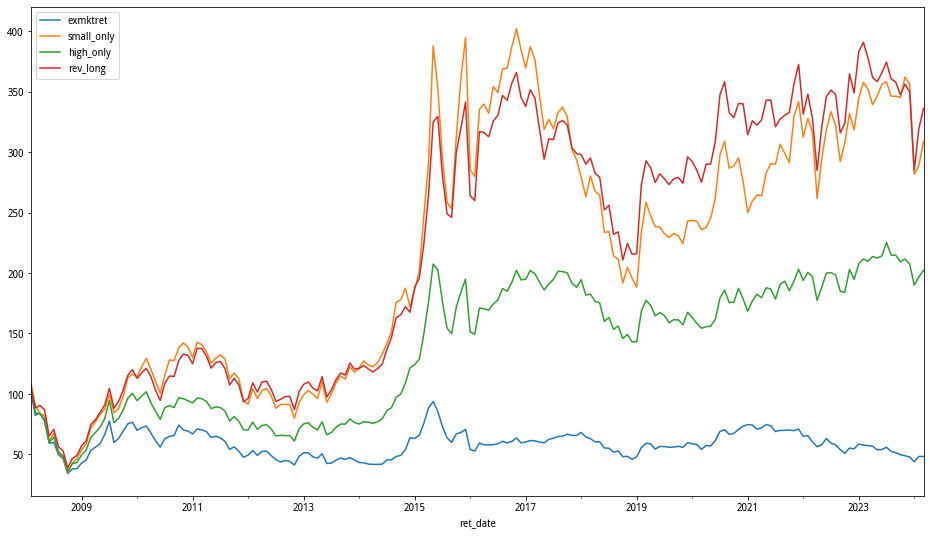

In [81]:
((1 + factors_long_df).cumprod()*100).plot()

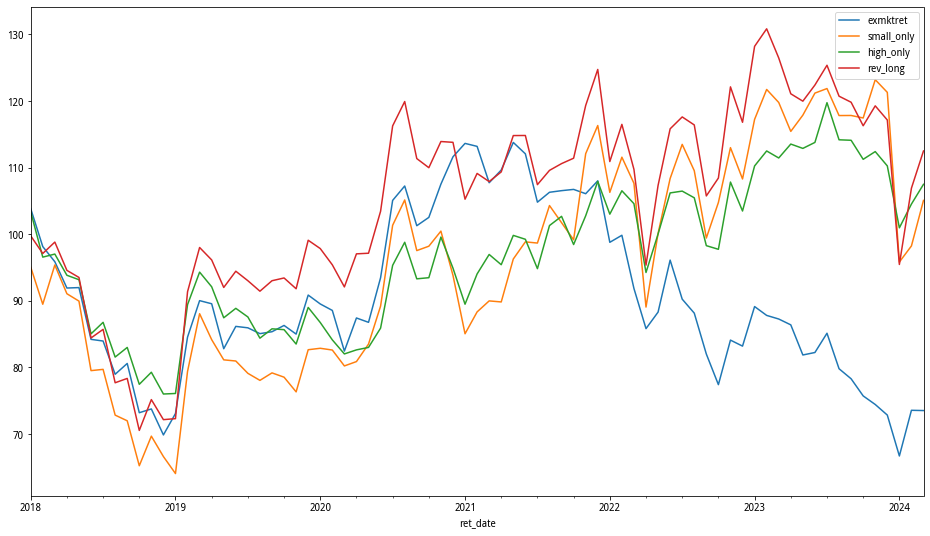

In [82]:
((1 + factors_long_df['2018':]).cumprod()*100).plot()

In [83]:
factors_long_df.to_csv('./output_data/factors/ff3_rev_long_only.csv')

In [84]:
factors_long_df.to_pickle('./output_data/factors/ff3_rev_long_only.pkl')